### Import Libraries

In [60]:
import pandas as pd
import os
import importlib
import json
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from actions import evaluate, helpers
importlib.reload(evaluate)
importlib.reload(helpers)
from actions.evaluate import ViolenceDetectionEvaluator
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

In [50]:
VIDEO_URLS_PATH = "../../data/metadata/video_links_labels.csv"
LABEL_COLUMN = "binary_label"

## Chatgpt judge

### API based results evaluation
With api-based transcripts (gemini)

In [51]:
api_based_df = helpers.append_results(
    [
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results1.csv",
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results2.csv",
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results3.csv",
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results4.csv",
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results5.csv",
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results6.csv",
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results7.csv",
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results8.csv",
    ]
)
metadata_df = pd.read_csv(VIDEO_URLS_PATH)
api_based_df = api_based_df.merge(metadata_df[[LABEL_COLUMN, "id"]], right_on="id", left_on="video_name", how="inner")


COMPREHENSIVE EVALUATION REPORT - Threshold: 0.50



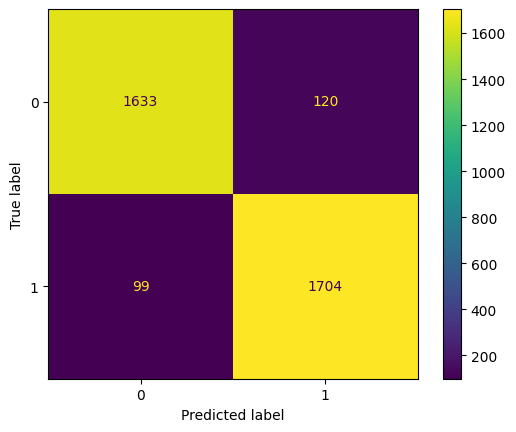


ROC CURVE ANALYSIS

AUC-ROC Score: 0.9779
   Interpretation: Excellent - Model has outstanding discrimination ability

Optimal Operating Point:
   Threshold: 0.630
   True Positive Rate (Recall): 0.936
   False Positive Rate: 0.054
   Specificity: 0.946


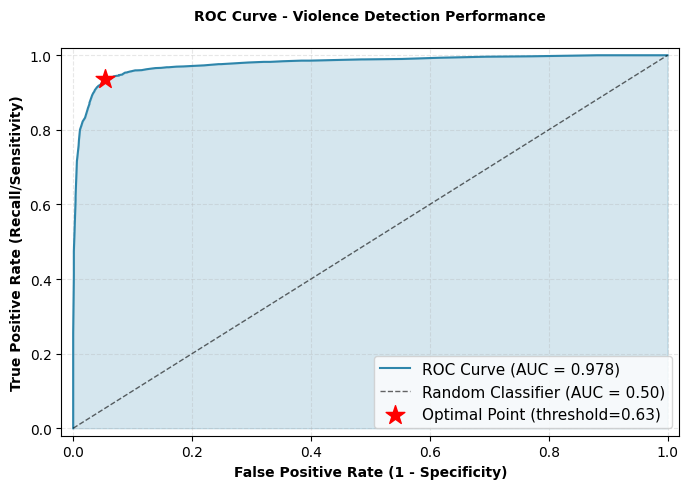


PROBABILITY CALIBRATION METRICS

BRIER SCORE: 0.0539
   Interpretation: Excellent - Predictions are well-calibrated

LOG LOSS: 0.2063
   Interpretation: Excellent - Very few overconfident mistakes

COMPARISON:
   Brier Score treats all errors uniformly (squared difference)
   Log Loss heavily penalizes overconfident wrong predictions

PREDICTION DISTRIBUTION:
   Violence Cases (ground truth = 1):
      Mean probability: 0.877
      Median probability: 0.930
      Std deviation: 0.174

   Non-Violence Cases (ground truth = 0):
      Mean probability: 0.171
      Median probability: 0.100
      Std deviation: 0.183


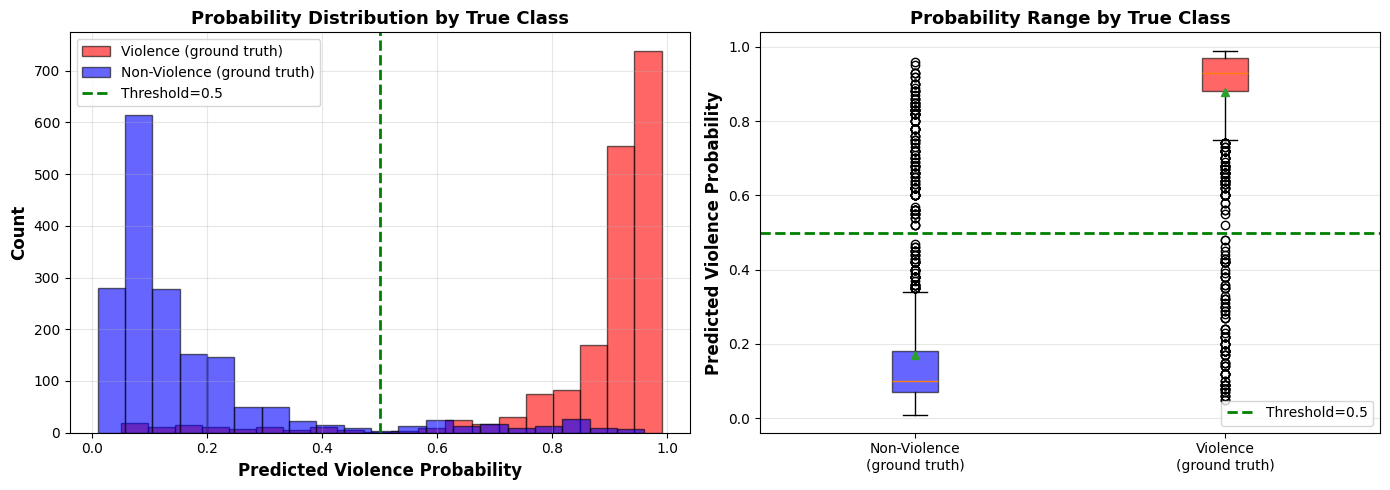

,total_videos,correct_predictions,incorrect_predictions
top_3_modalities,,,
transcripts|audio|vision,1591,1551,40
transcripts|vision|audio,1520,1433,87
vision|transcripts|audio,338,279,59
vision|audio|transcripts,82,41,41
audio|vision|transcripts,16,14,2
vision|audio,6,2,4
audio|transcripts|vision,2,2,0
audio|vision,1,1,0



──────────────────────────────────────────────────────────────────────
TRUE POSITIVES (1705 cases)
   Description: Correctly identified violence

   Average Violence Probability: 0.914
   Average Confidence: 0.895

──────────────────────────────────────────────────────────────────────
FALSE POSITIVES (135 cases)
   Description: Incorrectly flagged non-violence as violence

   Average Violence Probability: 0.726
   Average Confidence: 0.668

──────────────────────────────────────────────────────────────────────
FALSE NEGATIVES (98 cases)
   Description: Missed actual violence

   Average Violence Probability: 0.235
   Average Confidence: 0.698

──────────────────────────────────────────────────────────────────────
TRUE NEGATIVES (1618 cases)
   Description: Correctly identified non-violence

   Average Violence Probability: 0.125
   Average Confidence: 0.684

MODALITY RANKING ANALYSIS - Which Modality Contributes Most?

Position 1 = Primary contributor (most important)
Position 2 = Sec

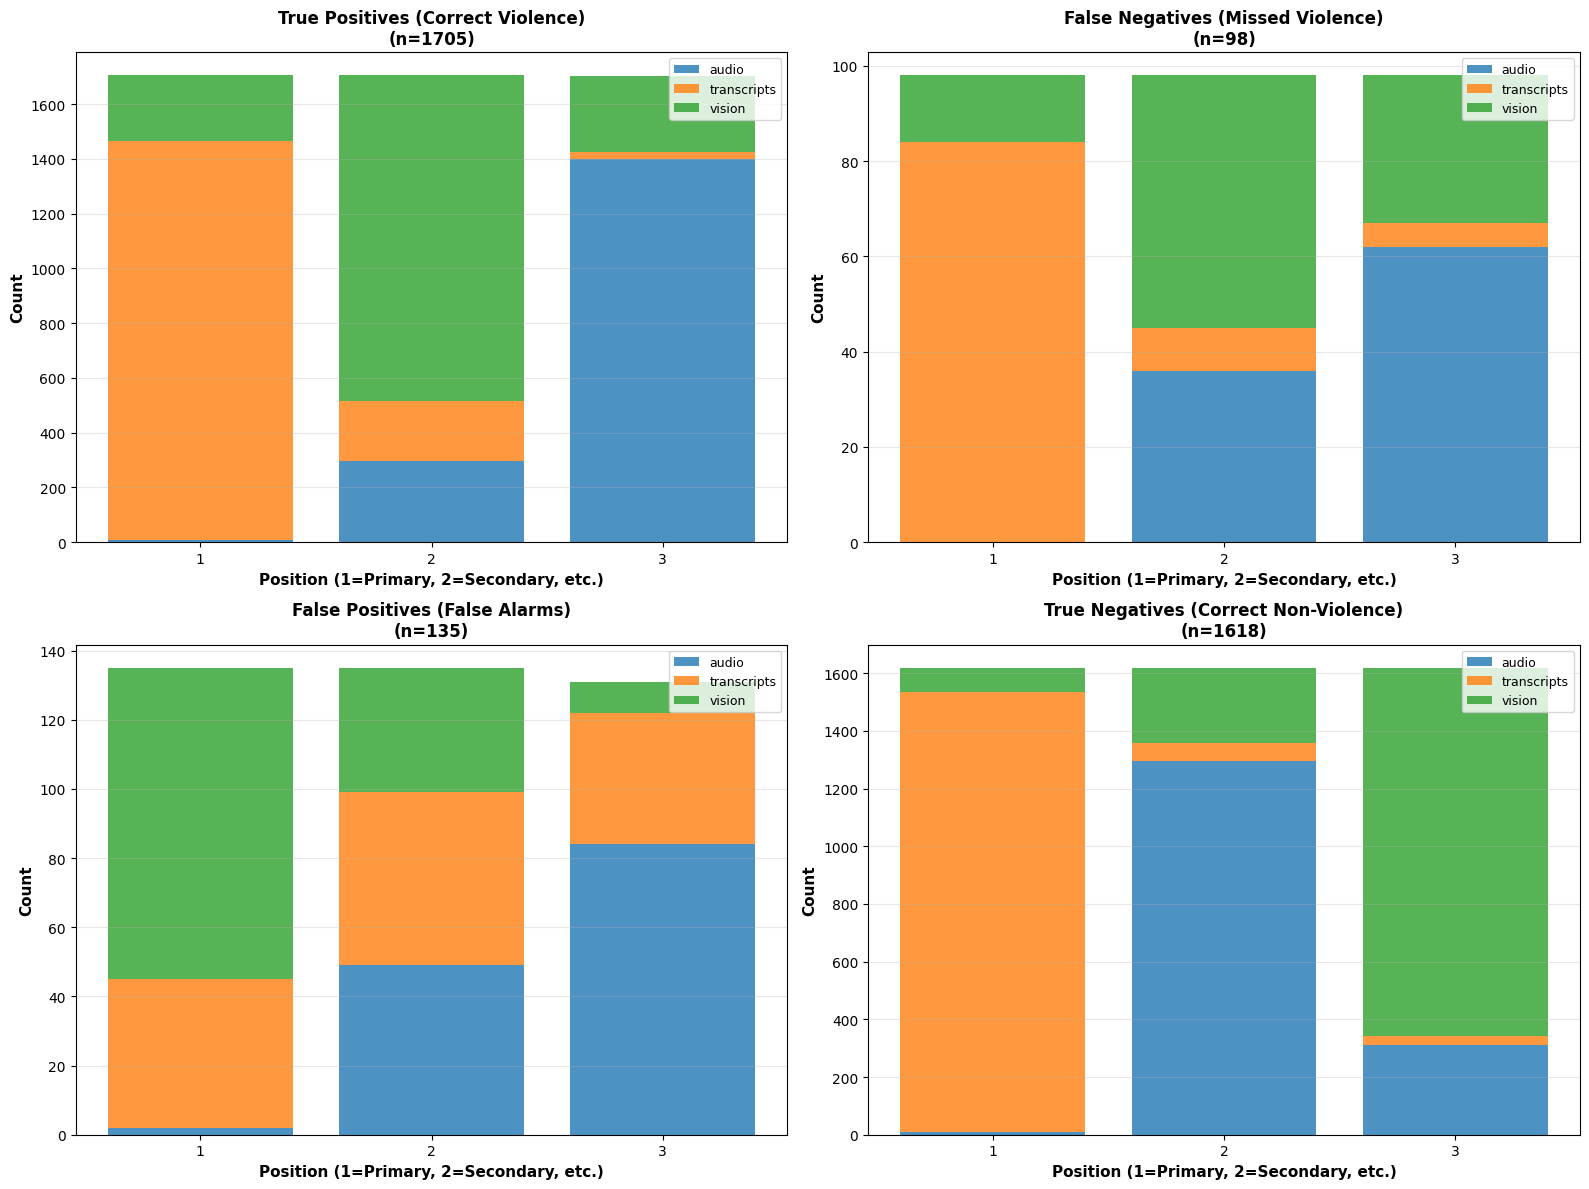


SUMMARY
AUC-ROC: 0.9779
F1 Score: 0.9396
Brier Score: 0.0539
Log Loss: 0.2063



In [52]:
# Initialize evaluator
evaluator = ViolenceDetectionEvaluator(api_based_df, ground_truth_col=LABEL_COLUMN)
report = evaluator.generate_complete_evaluation_report()

### Open source results evaluation

With open source transcripts (VAD + Whisper and Qwen)

In [53]:
open_source_df = helpers.append_results(
    [
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results1.csv",
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results2.csv",
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results3.csv",
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results4.csv",
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results5.csv",
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results6.csv",
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results7.csv",
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results8.csv",
    ]
)
metadata_df = pd.read_csv(VIDEO_URLS_PATH)
open_source_df = open_source_df.merge(metadata_df[[LABEL_COLUMN, "id"]], right_on="id", left_on="video_name", how="inner")


COMPREHENSIVE EVALUATION REPORT - Threshold: 0.50



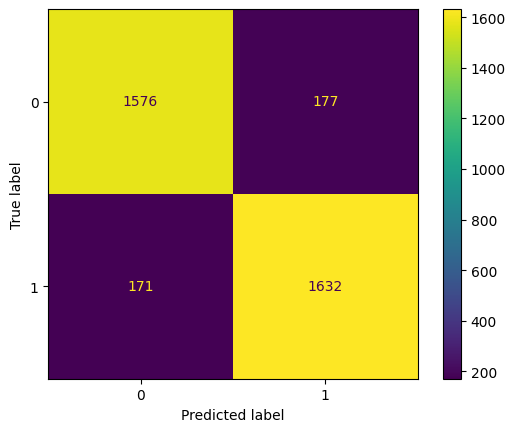


ROC CURVE ANALYSIS

AUC-ROC Score: 0.9593
   Interpretation: Excellent - Model has outstanding discrimination ability

Optimal Operating Point:
   Threshold: 0.450
   True Positive Rate (Recall): 0.915
   False Positive Rate: 0.115
   Specificity: 0.885


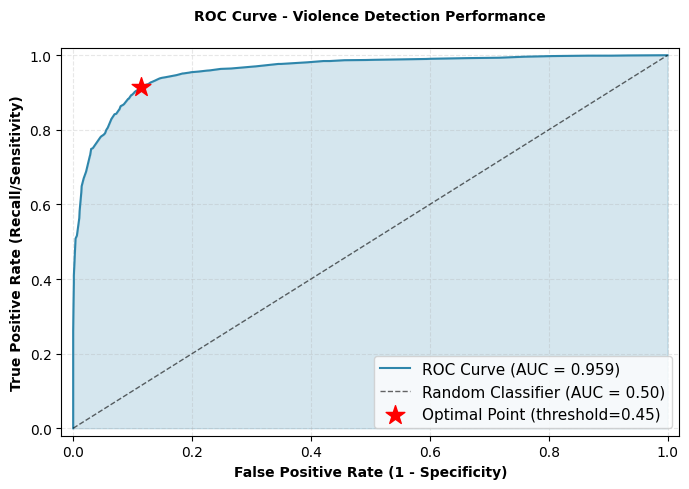


PROBABILITY CALIBRATION METRICS

BRIER SCORE: 0.0795
   Interpretation: Excellent - Predictions are well-calibrated

LOG LOSS: 0.2788
   Interpretation: Excellent - Very few overconfident mistakes

COMPARISON:
   Brier Score treats all errors uniformly (squared difference)
   Log Loss heavily penalizes overconfident wrong predictions

PREDICTION DISTRIBUTION:
   Violence Cases (ground truth = 1):
      Mean probability: 0.817
      Median probability: 0.900
      Std deviation: 0.198

   Non-Violence Cases (ground truth = 0):
      Mean probability: 0.209
      Median probability: 0.130
      Std deviation: 0.207


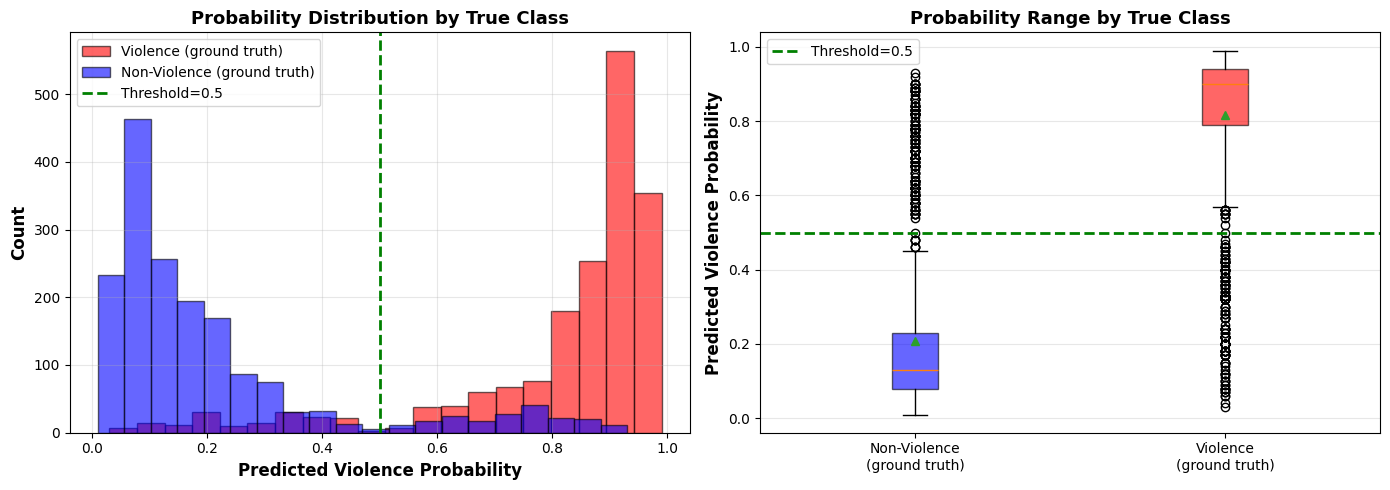

,total_videos,correct_predictions,incorrect_predictions
top_3_modalities,,,
transcripts|audio|vision,1224,1181,43
transcripts|vision|audio,928,860,68
vision|transcripts|audio,876,754,122
vision|audio|transcripts,388,290,98
audio|vision|transcripts,64,57,7
vision|audio,55,38,17
audio|transcripts|vision,20,18,2
transcripts|audio,1,1,0



──────────────────────────────────────────────────────────────────────
TRUE POSITIVES (1639 cases)
   Description: Correctly identified violence

   Average Violence Probability: 0.871
   Average Confidence: 0.847

──────────────────────────────────────────────────────────────────────
FALSE POSITIVES (193 cases)
   Description: Incorrectly flagged non-violence as violence

   Average Violence Probability: 0.730
   Average Confidence: 0.651

──────────────────────────────────────────────────────────────────────
FALSE NEGATIVES (164 cases)
   Description: Missed actual violence

   Average Violence Probability: 0.276
   Average Confidence: 0.612

──────────────────────────────────────────────────────────────────────
TRUE NEGATIVES (1560 cases)
   Description: Correctly identified non-violence

   Average Violence Probability: 0.144
   Average Confidence: 0.651

MODALITY RANKING ANALYSIS - Which Modality Contributes Most?

Position 1 = Primary contributor (most important)
Position 2 = Se

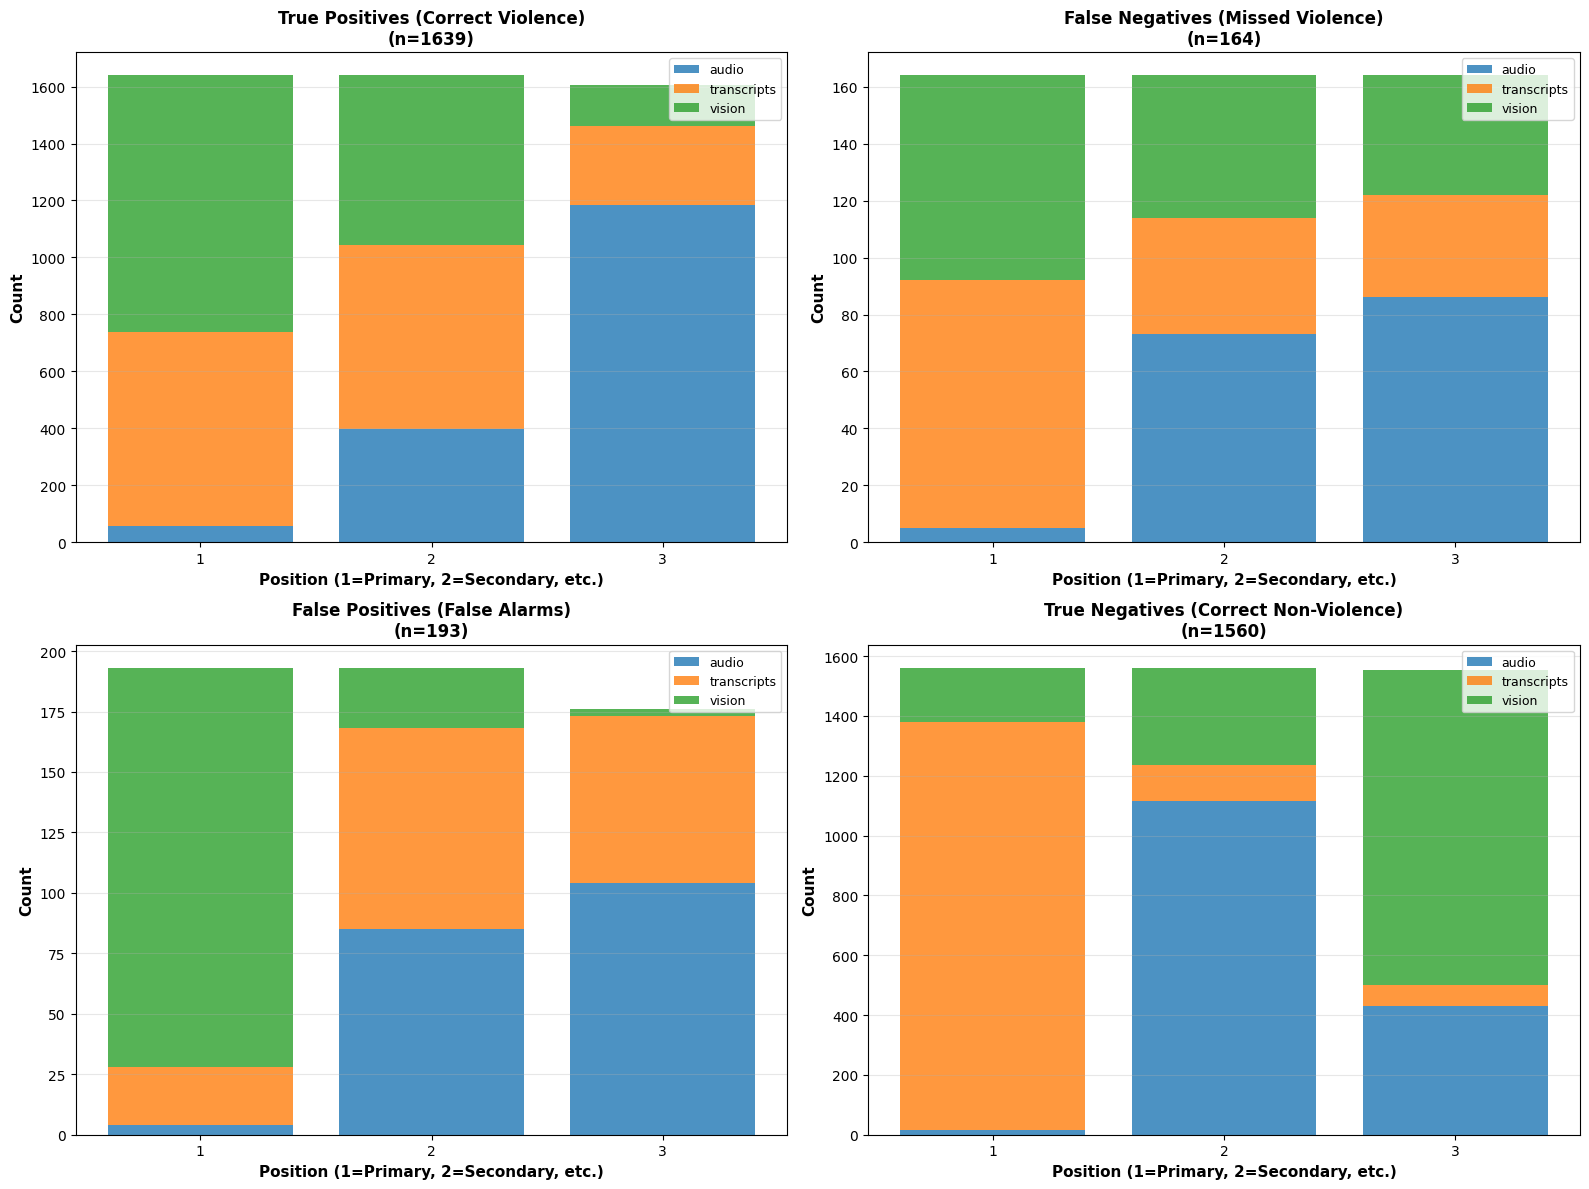


SUMMARY
AUC-ROC: 0.9593
F1 Score: 0.9037
Brier Score: 0.0795
Log Loss: 0.2788



In [54]:
# Initialize evaluator
evaluator = ViolenceDetectionEvaluator(open_source_df, ground_truth_col=LABEL_COLUMN)
report = evaluator.generate_complete_evaluation_report()

## Open source judge

### Qwen3-30b-a3b-thinking-2507

Using same prompt as before

In [56]:
open_source_df = pd.read_csv("../../data/results/zero_shot_classification/llm_judge_qwen/results.csv")
metadata_df = pd.read_csv(VIDEO_URLS_PATH)
open_source_df = open_source_df.merge(metadata_df[[LABEL_COLUMN, "id"]], right_on="id", left_on="video_name", how="inner")


COMPREHENSIVE EVALUATION REPORT - Threshold: 0.50



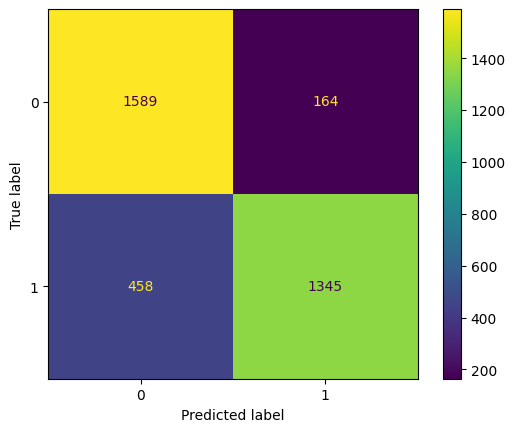


ROC CURVE ANALYSIS

AUC-ROC Score: 0.8727
   Interpretation: Good - Model performs well

Optimal Operating Point:
   Threshold: 0.250
   True Positive Rate (Recall): 0.774
   False Positive Rate: 0.112
   Specificity: 0.888


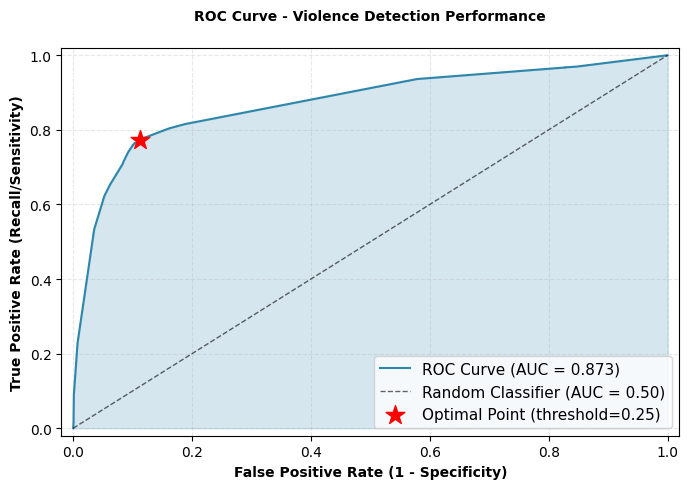


PROBABILITY CALIBRATION METRICS

BRIER SCORE: 0.1452
   Interpretation: Good - Predictions are reasonably calibrated

LOG LOSS: 0.9888
   Interpretation: Poor - Many overconfident wrong predictions

COMPARISON:
   Brier Score treats all errors uniformly (squared difference)
   Log Loss heavily penalizes overconfident wrong predictions

PREDICTION DISTRIBUTION:
   Violence Cases (ground truth = 1):
      Mean probability: 0.658
      Median probability: 0.850
      Std deviation: 0.323

   Non-Violence Cases (ground truth = 0):
      Mean probability: 0.145
      Median probability: 0.100
      Std deviation: 0.214


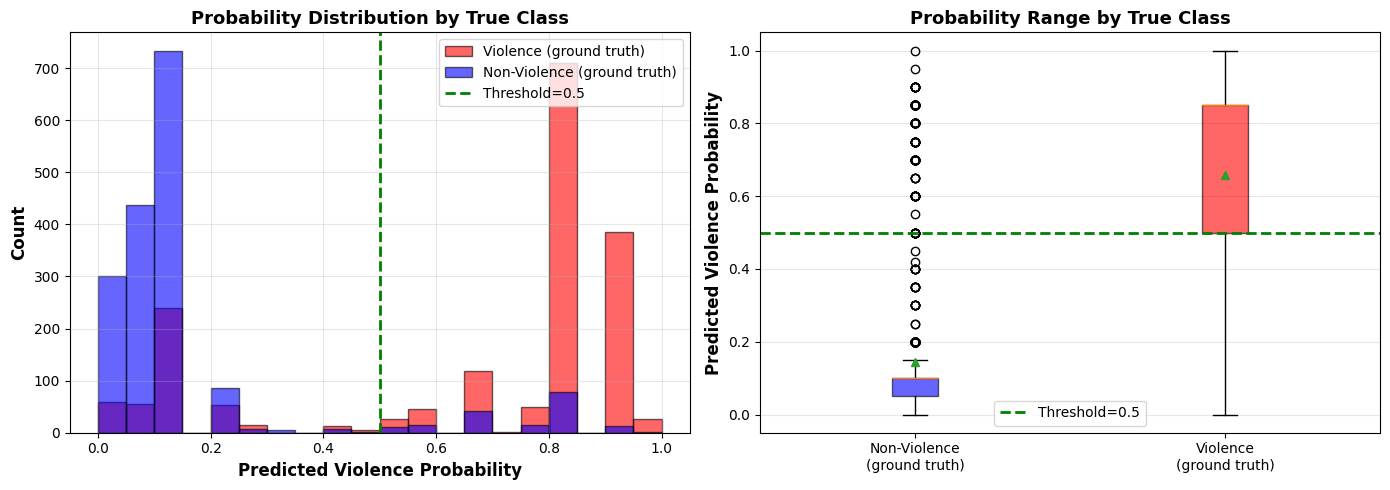

,total_videos,correct_predictions,incorrect_predictions
top_3_modalities,,,
transcripts,698,568,130
transcripts|audio,538,499,39
vision|transcripts,462,370,92
transcripts|vision,402,295,107
transcripts|vision|audio,398,352,46
transcripts|audio|vision,251,231,20
vision,225,120,105
vision|audio,177,135,42
vision|audio|transcripts,176,173,3



──────────────────────────────────────────────────────────────────────
TRUE POSITIVES (1363 cases)
   Description: Correctly identified violence

   Average Violence Probability: 0.834
   Average Confidence: 0.862

──────────────────────────────────────────────────────────────────────
FALSE POSITIVES (174 cases)
   Description: Incorrectly flagged non-violence as violence

   Average Violence Probability: 0.757
   Average Confidence: 0.780

──────────────────────────────────────────────────────────────────────
FALSE NEGATIVES (440 cases)
   Description: Missed actual violence

   Average Violence Probability: 0.113
   Average Confidence: 0.584

──────────────────────────────────────────────────────────────────────
TRUE NEGATIVES (1579 cases)
   Description: Correctly identified non-violence

   Average Violence Probability: 0.078
   Average Confidence: 0.584

MODALITY RANKING ANALYSIS - Which Modality Contributes Most?

Position 1 = Primary contributor (most important)
Position 2 = Se

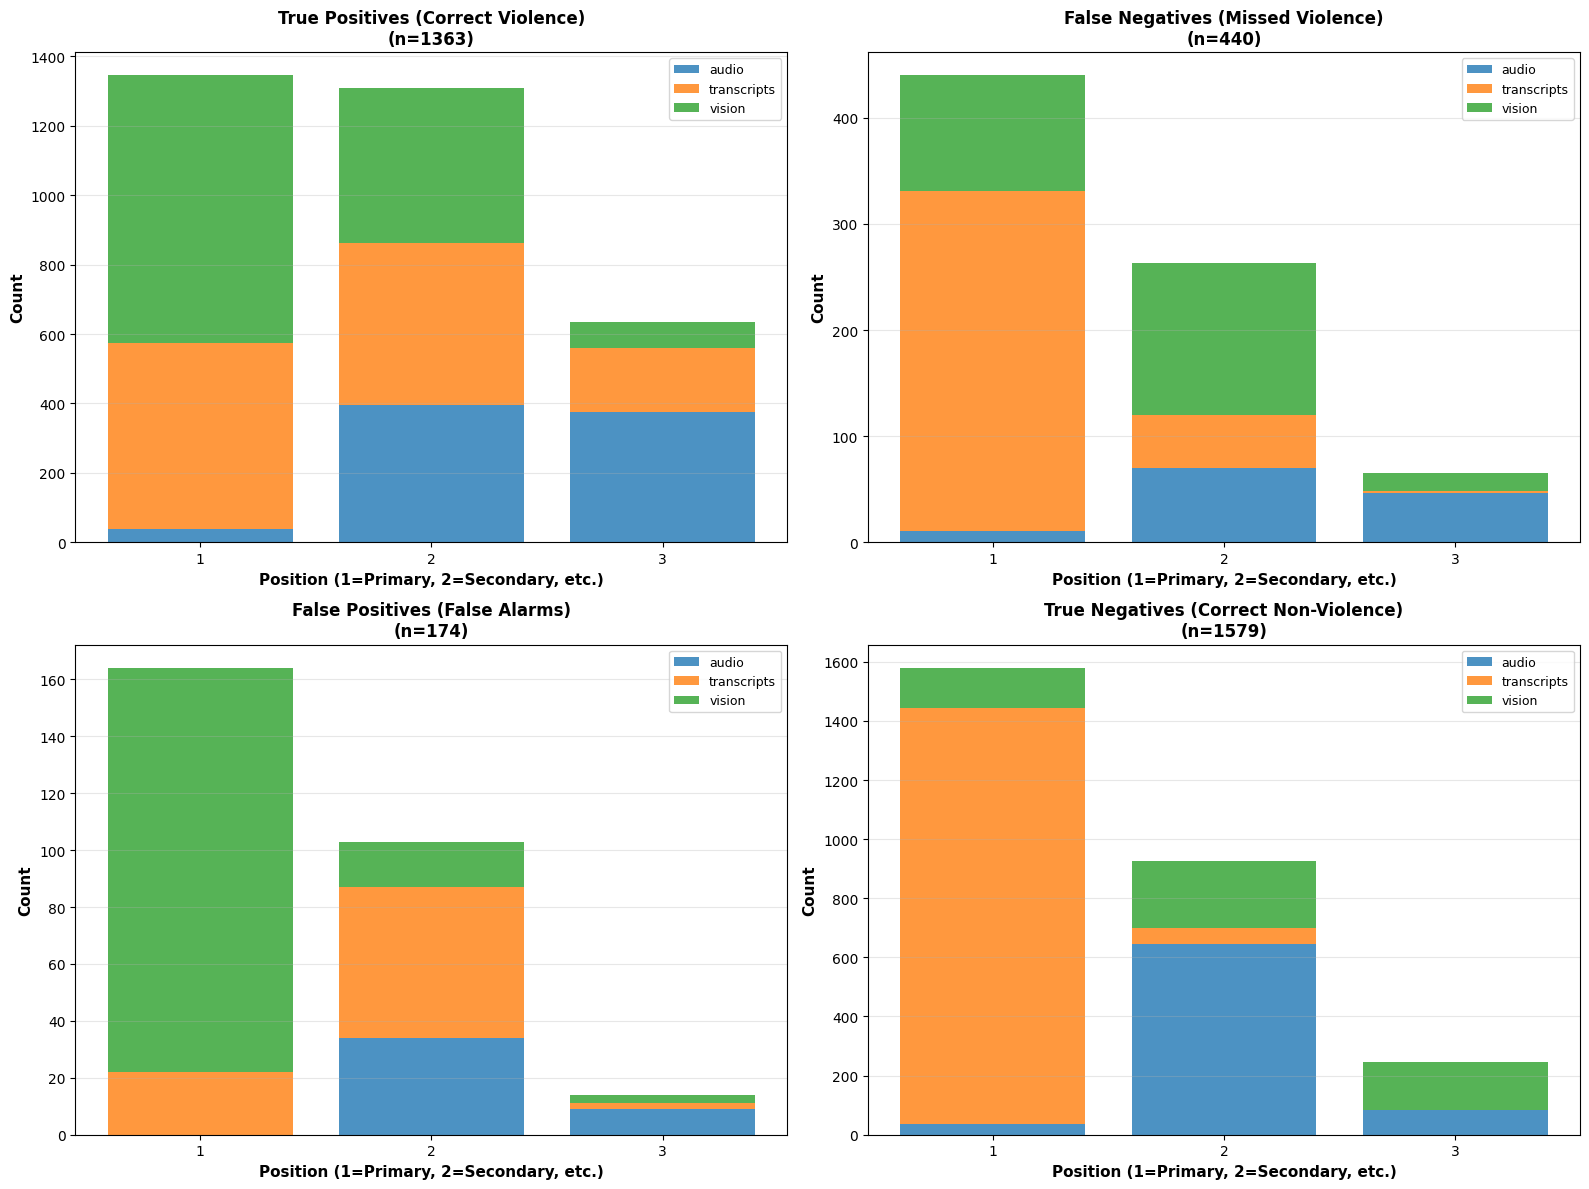


SUMMARY
AUC-ROC: 0.8727
F1 Score: 0.8122
Brier Score: 0.1452
Log Loss: 0.9888



In [57]:
# Initialize evaluator
evaluator = ViolenceDetectionEvaluator(open_source_df, ground_truth_col=LABEL_COLUMN)
report = evaluator.generate_complete_evaluation_report()

### Qwen3-30b-a3b-thinking-2507

Prompt engineering try 1: Focus on defining what violence is

In [61]:
open_source_df = pd.read_csv("../../data/results/zero_shot_classification/llm_judge_qwen/results_alt_prompt.csv")
metadata_df = pd.read_csv(VIDEO_URLS_PATH)
open_source_df = open_source_df.merge(metadata_df[[LABEL_COLUMN, "id"]], right_on="id", left_on="video_name", how="inner")


COMPREHENSIVE EVALUATION REPORT - Threshold: 0.50



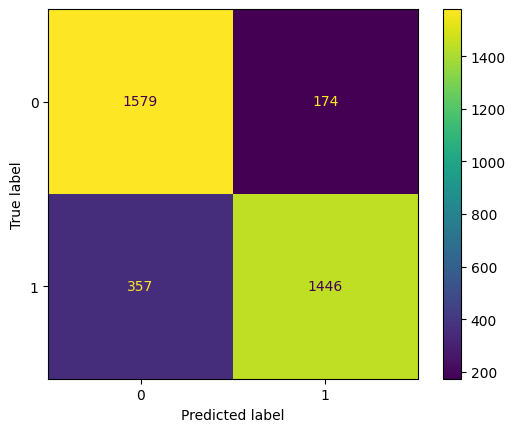


ROC CURVE ANALYSIS

AUC-ROC Score: 0.8654
   Interpretation: Good - Model performs well

Optimal Operating Point:
   Threshold: 0.500
   True Positive Rate (Recall): 0.811
   False Positive Rate: 0.104
   Specificity: 0.896


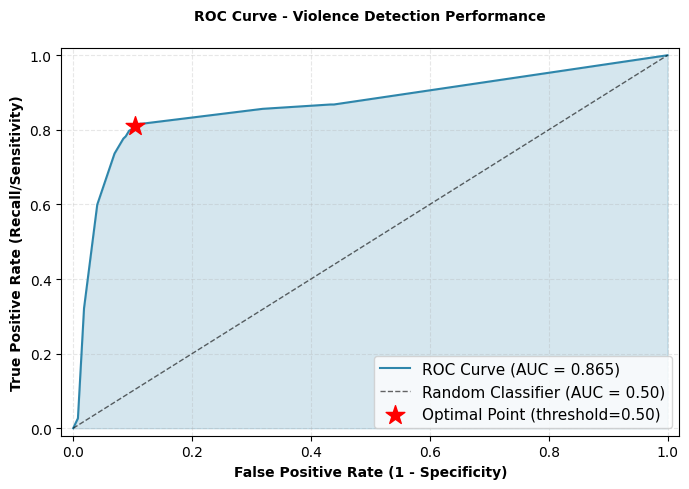


PROBABILITY CALIBRATION METRICS

BRIER SCORE: 0.1347
   Interpretation: Good - Predictions are reasonably calibrated

LOG LOSS: 2.7734
   Interpretation: Poor - Many overconfident wrong predictions

COMPARISON:
   Brier Score treats all errors uniformly (squared difference)
   Log Loss heavily penalizes overconfident wrong predictions

PREDICTION DISTRIBUTION:
   Violence Cases (ground truth = 1):
      Mean probability: 0.734
      Median probability: 0.900
      Std deviation: 0.346

   Non-Violence Cases (ground truth = 0):
      Mean probability: 0.116
      Median probability: 0.000
      Std deviation: 0.252


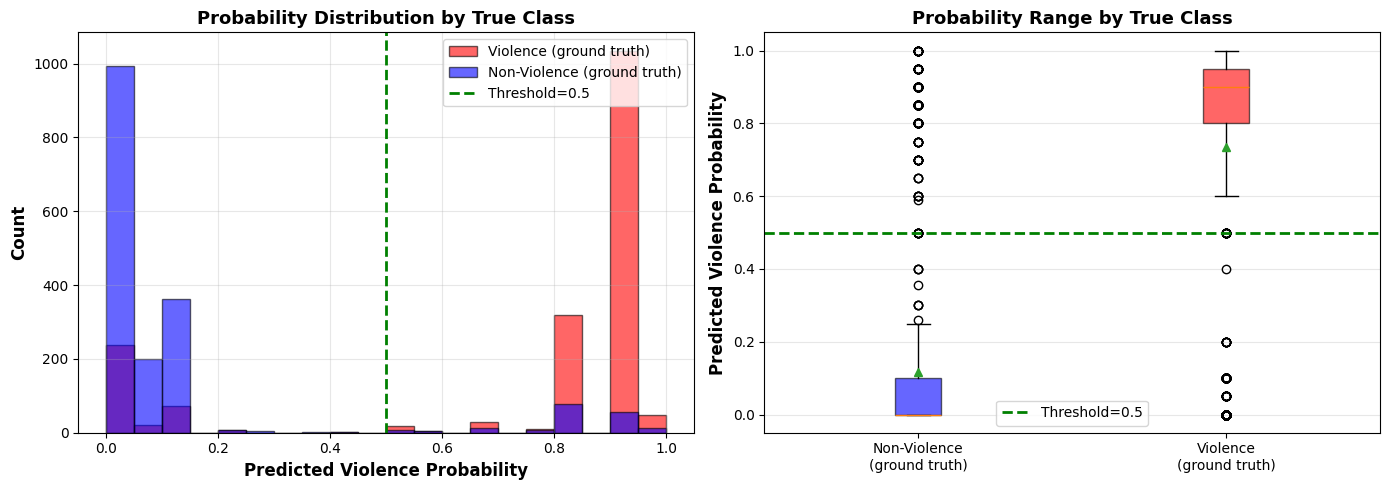

,total_videos,correct_predictions,incorrect_predictions
top_3_modalities,,,
transcripts,878,720,158
transcripts|vision|audio,483,429,54
transcripts|audio,397,366,31
vision|transcripts,375,313,62
transcripts|audio|vision,354,328,26
vision|audio|transcripts,341,324,17
transcripts|vision,207,159,48
vision|audio,203,153,50
vision|transcripts|audio,126,117,9



──────────────────────────────────────────────────────────────────────
TRUE POSITIVES (1463 cases)
   Description: Correctly identified violence

   Average Violence Probability: 0.897
   Average Confidence: 0.887

──────────────────────────────────────────────────────────────────────
FALSE POSITIVES (182 cases)
   Description: Incorrectly flagged non-violence as violence

   Average Violence Probability: 0.836
   Average Confidence: 0.829

──────────────────────────────────────────────────────────────────────
FALSE NEGATIVES (340 cases)
   Description: Missed actual violence

   Average Violence Probability: 0.030
   Average Confidence: 0.829

──────────────────────────────────────────────────────────────────────
TRUE NEGATIVES (1571 cases)
   Description: Correctly identified non-violence

   Average Violence Probability: 0.032
   Average Confidence: 0.804

MODALITY RANKING ANALYSIS - Which Modality Contributes Most?

Position 1 = Primary contributor (most important)
Position 2 = Se

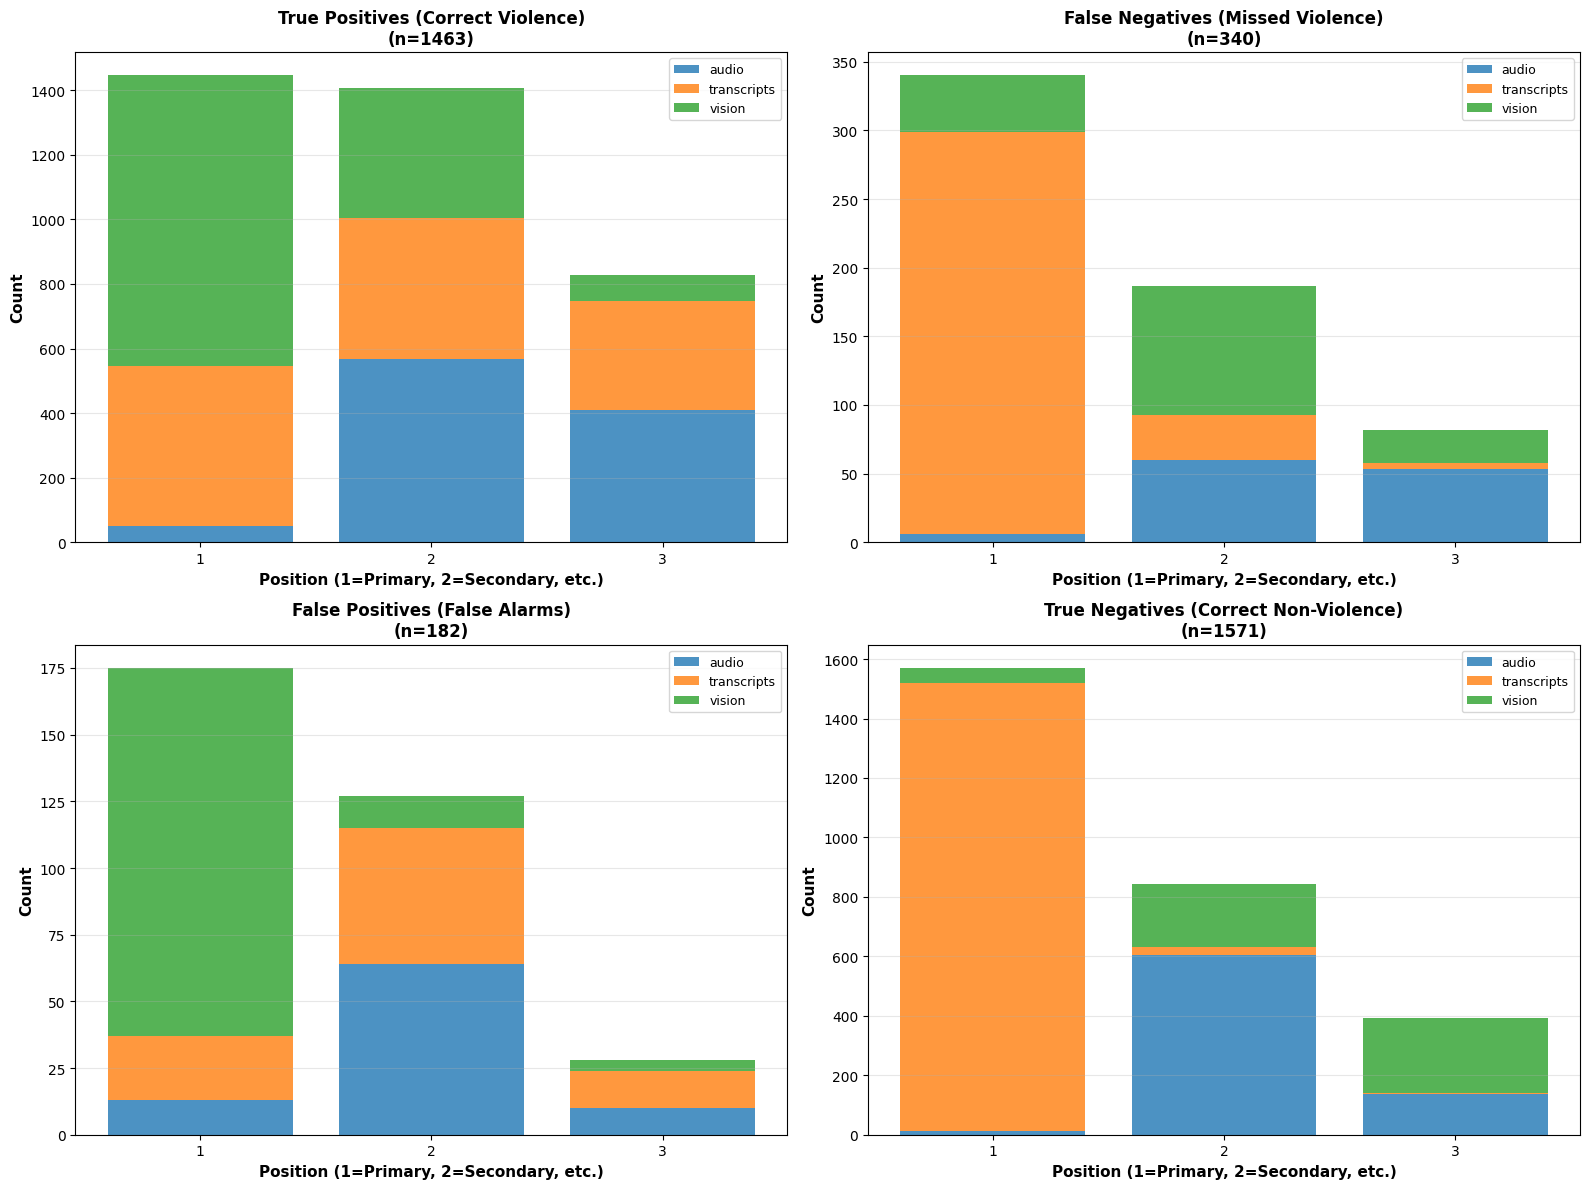


SUMMARY
AUC-ROC: 0.8654
F1 Score: 0.8449
Brier Score: 0.1347
Log Loss: 2.7734



In [62]:
# Initialize evaluator
evaluator = ViolenceDetectionEvaluator(open_source_df, ground_truth_col=LABEL_COLUMN)
report = evaluator.generate_complete_evaluation_report()